<a href="https://colab.research.google.com/github/schauppi/Udemy_TensorFlow_Developer/blob/main/Abschnit_10_Time_series_fundamentals_in_TensorFlow/10_time_series_forecasting_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Time series forecasting fundamentals with TensorFlow + Milestone Project 3: BitPredict

## Get data

We´re going to be using the historical price data of Bitcoin to try to predict the future price of Bitcoin.

In [569]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2021-08-30 08:50:52--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv.3’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.03s   

2021-08-30 08:50:53 (6.17 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv.3’ saved [178509/178509]



## Importing time series with pandas

In [570]:
# Import with pandas
import pandas as pd
# Read in our Bitcoin data and parse the dates
df = pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                 parse_dates=["Date"],
                 index_col=["Date"]) #Parse the date column and tell pandas column 1 is a datetime

In [571]:
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [572]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [573]:
# How many samples do we have?
len(df)

2787

In [574]:
df.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


In [575]:
#Only want closing price for each day
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


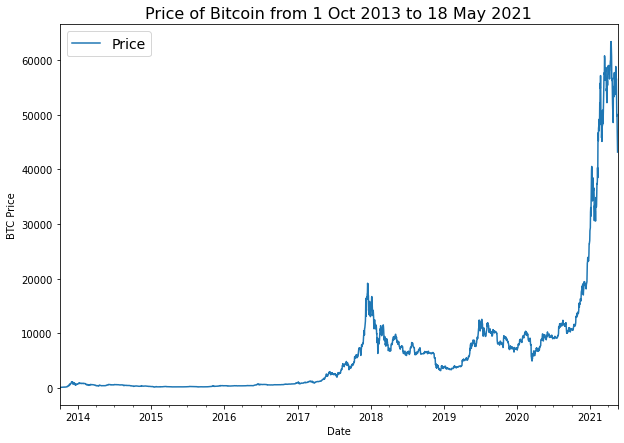

In [576]:
import matplotlib.pyplot as plt

bitcoin_prices.plot(figsize=(10,7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.legend(fontsize=14)

## Import time series data with Python´s CSV module

In [577]:
# Importing and formatting historical Bitcoin data with Python
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",")
  next(csv_reader) #Skip first line (gets rid of the column titles)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d")) #get the dates as dates (not as string)
    btc_price.append(float(line[2]))

#View first 10 of each
timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

No handles with labels found to put in legend.


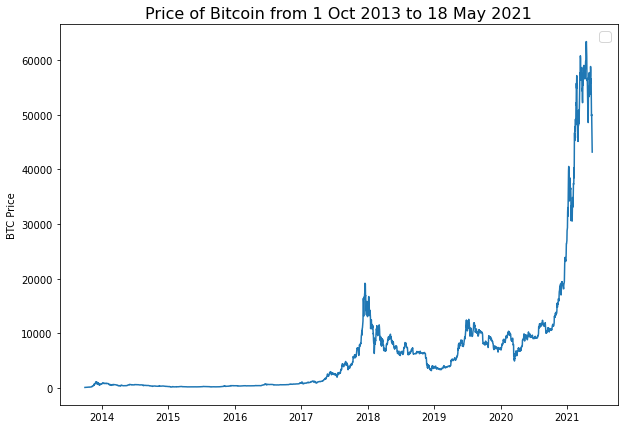

In [578]:
#Plot from CSV
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10,7))
plt.plot(timesteps, btc_price)
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.legend(fontsize=14)

## Format data part 1: Create train and test sets of our time series data

### Creating train and test sets with tume series data

In [579]:
# Get bitcoin data array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

### Create train & test sets for time series

In [580]:
# Create train and test splits for time series data
split_size = int(0.8*len(prices)) #80% train, 20% test

#Create train data splits (everything before the split)
x_train, y_train = timesteps[:split_size], prices[:split_size]

#Create test data splits (everything beyond the split)
x_test, y_test = timesteps[split_size:], prices[split_size:]

len(x_train), len(y_train), len(x_test), len(y_test)

(2229, 2229, 558, 558)

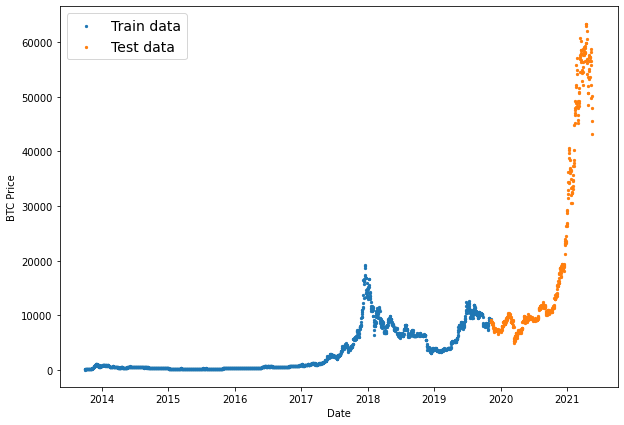

In [581]:
# plot train and test set
plt.figure(figsize=(10,7))
plt.scatter(x_train, y_train, s=5, label="Train data")
plt.scatter(x_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show()

## Create a plotting function

In [582]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format=".", start=0, end=None, label=None):
  """
  Plots timesteps (a series of points in time) against values (a series of values across timestimps)
  Parameters:
    timestamps: array of timestep values
    values: array of values across time
    format: style of plot, default "."
    start: where to start the plot (setting a value will index from start of timesteps)
    end: where to end the plot (similar to start but for the end)
    label: label to show on plot about values, default None
  """
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) #make label bigger
  plt.grid(True)

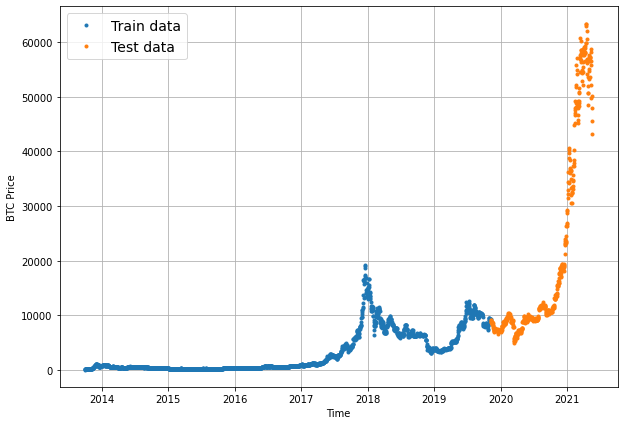

In [583]:
#Test out plotting function
plt.figure(figsize=(10,7))
plot_time_series(timesteps=x_train, values=y_train, label="Train data")
plot_time_series(timesteps=x_test, values=y_test, label="Test data")

## Modelling Experiments



In [584]:
naive_forecast = y_test[:-1]

In [585]:
naive_forecast[-10:]

array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
       56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
       47885.62525472, 45604.61575361])

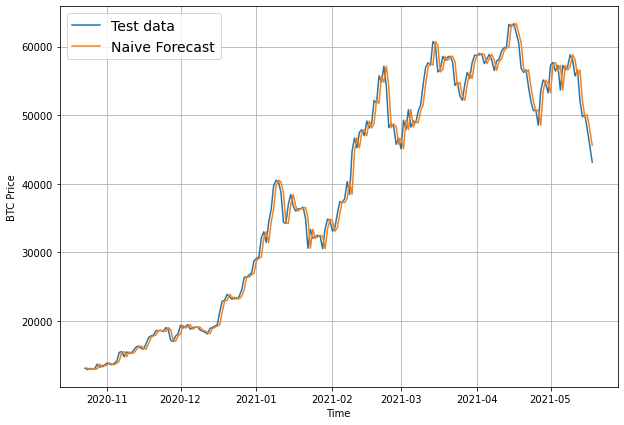

In [586]:
plt.figure(figsize=(10,7))
plot_time_series(timesteps=x_test, values=y_test, start=350, format="-", label="Test data")
plot_time_series(timesteps=x_test[1:], values=naive_forecast, start=350, format="-", label="Naive Forecast")

## Evaluating a time series model - Evaluation metrics

We´re predicting a number - so that means we have a form of a regression problem.

Because we´re working on a regression problem, we´ll need some a regression-like metrics.

A few comoon regression metrics (which can also be used for time series forecasting)
* MAE - mean absolute error
* MSE - mean squarred error

For all of the above metrics, lower is better, for example, an MAE of 0 that is better than an MAE of 100.

The main thing we´re evaluating here is: how do our model´s forecast (y_pred) compare against the actual values (y_true or ground truth values)

In [587]:
import tensorflow as tf

# MASE implementation
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true-y_pred))

  # Find MAE of naive forecat (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:]-y_true[:-1])) #our seasonality is 1 day (hence the shift is 1)

  return mae / mae_naive_no_season

In [588]:
mean_absolute_scaled_error(y_true = y_test[1:], y_pred=naive_forecast).numpy()


0.9995699939182624

In [589]:
# Create a function to take in model prediction an truth values and return evaluation metrics
def evaluate_preds(y_true, y_pred):
  # Make sure float32 datatype (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  #Calculate various evaluation metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [590]:
naive_results = evaluate_preds(y_true=y_test[1:], y_pred=naive_forecast)

In [591]:
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

## Other models you can use for baselines and for actual forecasts

In this notebook, we´re focused on TensorFlow and deep learning models.

However there are plenty of other styles of time series forecasting models.

## Format Data Part 2: Windowing our data

Why do we window?

We window our time series dataset to turn our data in a supervised learning problem.

Windowing for one week
[0, 1, 2, 3, 4, 5] - > [6]
[1, 2, 3, 4, 5, 6] -> [7]
[2, 3, 4, 5, 6, 7] -> [8]

In [592]:
len(y_train)

2229

In [593]:
#What we want to do with our Bitcoin data
print(f"We want to use: {btc_price[:7]} to predict {btc_price[7]}")

We want to use: [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] to predict 123.033


In [594]:
#Let´s setup global variables for window and horizon size
HORIZON = 1 #predict next 1 day
WINDOW_SIZE = 7 #use the past week of bitcoin data to make the prediction

In [595]:
#Create function to label windowed data
def get_labelled_windows(x, horizon=HORIZON):
  """
  Creates labels for windowed dataset.

  E.g. if horizon = 1
  Input: [0, 1, 2, 3, 4, 5, 6, 7] -> Output: ([0, 1, 2, 3, 4, 5, 6], [7])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [596]:
#Test out the window labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8), axis=0))
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [0 1 2 3 4 5 6] -> Label: 7


We´ve got a wa to label our windowd data. 

This only works on a small scale. 

We need a way to do the above across entire time series.

We could do this with Python foor loops, however, for large time series this is quite slow. To speed things up, we´ll lerverage NumPy´s array indexing.

Our function will:
1. Create a window step of specific window size (e.g. [0, 1, 2, 3, 4, 5, 6])
2. Use NumPy indexing to create a 2D array of multiple window steps, for example:

```
[[0, 1, 2, 3, 4, 5, 6],
[1, 2, 3, 4, 5, 6, 7],
[2, 3, 4, 5, 6, 7, 8]]
```
2. Uses the 2D array of multiple window steps (form 2.) to index on a target series (e.g. the historical price of Bitcoin)
4. Uses our 'get_labelled_windows()` function we created above to turn the window steps into windows with a specified horizon.

https://towardsdatascience.com/fast-and-robust-sliding-window-vectorization-with-numpy-3ad950ed62f5

In [597]:
import numpy as np
#Create function to view NumPy arrays as windows
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
  """
  Turn a 1D array into a 2D array of sequential labelled windows of window_size with horizon size labels
  """
  # 1. Create a window of specific window_size (add the horizon on the end for labelling later)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x) - (window_size+horizon-1)), axis=0).T #create 2D array of windows of size window_size

  # 3. Index on the target array ( a time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 5 Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)
  return windows, labels

In [598]:
full_windows, full_labels = make_windows(prices)

In [599]:
len(full_windows), len(full_labels)

(2780, 2780)

In [600]:
#View the first 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label [125.96116]


##Turning windows into training an test sets

In [601]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits
  """
  split_size =  int(len(windows) * (1-test_split)) #this will default to 80% train and 20% test split
  train_labels = labels[:split_size]
  test_labels = labels[split_size:]
  train_windows = windows[:split_size]
  test_windows = windows[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [602]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(train_labels), len(test_windows), len(test_labels)

(2224, 2224, 556, 556)

In [603]:
train_windows[:5], train_labels[5:]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]), array([[ 126.38333   ],
        [ 135.24199   ],
        [ 133.20333   ],
        ...,
        [9335.75240233],
        [9226.48582088],
        [8794.35864452]]))

## Make a modelling checkpoint

Because our model´s performance will fluctuate from experiment to experiment, we´re going to write a model checkpoint so we can compare apples to apples.

More specifically, we want to compare each of our model´s best performances against the other model´s best performances.

For example if our model performs the best on epoch 55 (but we´re training for 100 epochs), we want to load and evaluate the model saved on epoch 55.

In [604]:
import os

#Create a function to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            verbose=0, #only output a limited amount of text
                                            save_best_only=True)

## Model 1: Dense model (window = 7, horizon = 1)

Our first deep model is going to be a simple dense model:
* A single dense layer with 128 hidden units ans Relu
* An output layer with linear activation (no activation)
* Adam optimizer and MAE loss function
* Batch size of 128 (previously we´ve used 32)
* 100 epochs

* Hyperparameters = values a machine learning practitioner can adjust themselves
* Parameters = values a model learns on its own

In [605]:
import tensorflow as tf
from tensorflow.keras import layers

#Set random seed
tf.random.set_seed(42)

# Build the model
model_1 = tf.keras.Sequential([
                               layers.Dense(128, activation="relu"),
                               layers.Dense(HORIZON, activation="linear") #linear = no activation
], name="model_1_dense")

In [606]:
#Compile the model
model_1.compile(loss="mae",
                optimizer="Adam",
                metrics=["mae", "mse"])

In [607]:
#Fit the model 
model_1.fit(train_windows, train_labels,
            epochs=100, verbose=1,
            batch_size=128, validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_1.name)])

Epoch 1/100
18/18 [==============================] - 1s 14ms/step - loss: 780.3455 - mae: 780.3455 - mse: 2312725.7500 - val_loss: 2279.6526 - val_mae: 2279.6526 - val_mse: 12772728.0000
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets
Epoch 2/100
18/18 [==============================] - 0s 5ms/step - loss: 247.6756 - mae: 247.6756 - mse: 285481.1875 - val_loss: 1005.9991 - val_mae: 1005.9991 - val_mse: 3441833.5000
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets
Epoch 3/100
18/18 [==============================] - 0s 5ms/step - loss: 188.4116 - mae: 188.4116 - mse: 171891.5625 - val_loss: 923.2862 - val_mae: 923.2862 - val_mse: 2868220.5000
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets
Epoch 4/100
18/18 [==============================] - 0s 5ms/step - loss: 169.4340 - mae: 169.4340 - mse: 151700.5625 - val_loss: 900.5872 - val_mae: 900.5872 - val_mse: 2683715.2500
INFO:tensorflow:Assets written to: model_ex

In [608]:
# Evaluate model on test data
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 585.9762 - mae: 585.9762 - mse: 1197803.1250


[585.9761962890625, 585.9761962890625, 1197803.125]

In [609]:
# Load in the saved best perfoming model_1 and evaluate it on test data
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense/")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 568.9512 - mae: 568.9512 - mse: 1171744.0000


[568.951171875, 568.951171875, 1171744.0]

## Making forecasts with a model (on the test dataset)

To make "forecasts" on the test dataset (note: these won´t be actual forecasts, they´re only pseudo forecasts because actual forecasts are into the future), let´s write a function to:

1. Take in a train model 
2. Takes in some input data (same kind of data the model was trained on)
3. Passes the input data to the model predict() method
4. Return the predictions

In [610]:
def make_preds(model, input_data):
  """
  Uses model to make predictions on input_data
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) #return 1D array of predictions

In [611]:
# Make predictions using model_1 on the test dataset 
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

(556, <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8861.711, 8769.886, 9015.71 , 8795.517, 8723.809, 8730.11 ,
        8691.95 , 8502.054, 8460.961, 8516.547], dtype=float32)>)

In [612]:
# Evaluate preds
model_1_results = evaluate_preds(tf.squeeze(test_labels), model_1_preds)
model_1_results

{'mae': 568.95123,
 'mape': 2.5448983,
 'mase': 0.9994897,
 'mse': 1171744.0,
 'rmse': 1082.4712}

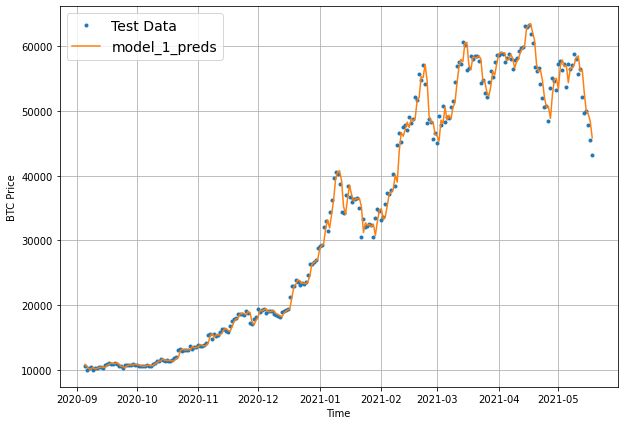

In [613]:
# Let´s plot our model 1 predictions
offset = 300
plt.figure(figsize=(10,7))
# Account for the test_window offset and index into test_labels to ensure correct plottting
plot_time_series(x_test[-len(test_windows):], test_labels[:, 0], start=offset, label="Test Data")
plot_time_series(x_test[-len(test_windows):], model_1_preds, start=offset, format="-", label="model_1_preds")

## Model 2: Dense (window=30, horizon=1)

In [614]:
HORIZON = 1 #predict one time step at a time
WINDOW_SIZE = 30 #use 30 timesteps in the pas

In [615]:
# Make windowed data with appropriate horizon and window size
full_windows, full_labels = make_windows(prices, WINDOW_SIZE, HORIZON)
len(full_windows), len(full_labels)

(2757, 2757)

In [616]:
# Make train and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels, test_split=0.2)
len(train_windows), len(train_labels), len(test_windows), len(test_labels)

(2205, 2205, 552, 552)

In [617]:
train_windows[:3]

array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
        126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
        152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166,
        180.355  , 175.03166, 177.6965 , 187.15983, 192.75666, 197.4    ],
       [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
        123.033  , 124.049  , 125.96116, 125.27966, 125.9275 , 126.38333,
        135.24199, 133.20333, 142.76333, 137.92333, 142.95166, 152.55183,
        160.33883, 164.31499, 177.63333, 188.29716, 200.70166, 180.355  ,
        175.03166, 177.6965 , 187.15983, 192.75666, 197.4    , 196.02499],
       [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
        124.049  , 125.96116, 125.27966, 125.9275 , 126.38333, 135.24199,
        133.20333, 142.76333, 137.92333, 142.95166, 152.55183, 160.33883,
        164.31499, 177.63333, 188.29

In [618]:
train_labels[:3]

array([[196.02499],
       [198.04883],
       [198.93233]])

In [619]:
#Set random seed
tf.random.set_seed(42)

#Build the model 
model_2 = tf.keras.Sequential([
                               layers.Dense(128, activation="relu"),
                               layers.Dense(HORIZON)
], name="model_2_dense")

In [620]:
#Compile the model 
model_2.compile(loss="mae", optimizer="Adam", metrics=["mae", "mse"])

In [621]:
#Fit the model 
model_2.fit(train_windows, train_labels,
            epochs=100, batch_size=128, 
            validation_data=(test_windows, test_labels),
            verbose=0, 
            callbacks=[create_model_checkpoint(model_2.name)])

INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: mod

In [622]:
#Evaluate model 2 on test data
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 608.9615 - mae: 608.9615 - mse: 1281438.8750


[608.9614868164062, 608.9614868164062, 1281438.875]

In [623]:
# Load in best performing model
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 608.9615 - mae: 608.9615 - mse: 1281438.8750


[608.9614868164062, 608.9614868164062, 1281438.875]

In [624]:
#Get forecast predictions
model_2_preds = make_preds(model_2, test_windows)

In [625]:
print(test_labels.shape)
print(tf.squeeze(test_labels).shape)
print(model_2_preds.shape)

(552, 1)
(552,)
(552,)


In [626]:
# Evaluate results for model 2 predictions
model_2_results = evaluate_preds(tf.squeeze(test_labels), model_2_preds)
model_2_results

{'mae': 608.9615,
 'mape': 2.7693386,
 'mase': 1.0644706,
 'mse': 1281438.8,
 'rmse': 1132.0065}

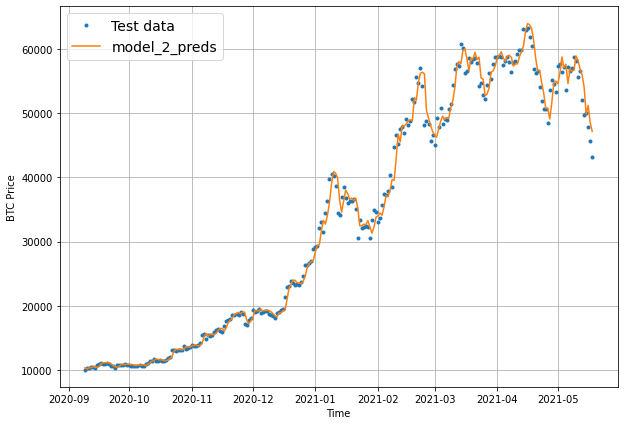

In [627]:
offset = 300
plt.figure(figsize=(10,7))
plot_time_series(x_test[-len(test_windows):], test_labels[:, 0], start=offset, label="Test data")
plot_time_series(x_test[-len(test_windows):], model_2_preds, start=offset,format="-", label="model_2_preds")

## Model 3: Dense (window=30, horizon=7)

In [628]:
HORIZON = 7
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(prices, WINDOW_SIZE, HORIZON)

In [629]:
len(full_windows), len(full_labels)

(2751, 2751)

In [630]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)

In [631]:
len(train_windows), len(train_labels), len(test_windows), len(test_labels)

(2200, 2200, 551, 551)

In [632]:
tf.random.set_seed(42)

#Build the model
model_3 = tf.keras.Sequential([
                               layers.Dense(128, activation="relu"),
                               layers.Dense(HORIZON)
], name="model_3_dense")

In [633]:
#Compile the model
model_3.compile(loss="mae", optimizer="Adam", metrics=["mae", "mse"])

In [634]:
#Fit the model
model_3.fit(train_windows, train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_3.name)])

INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: mod

In [635]:
# Evaluate the model on the test data
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1321.5201 - mae: 1321.5201 - mse: 5726832.0000


[1321.5201416015625, 1321.5201416015625, 5726832.0]

In [636]:
# Load in best version of model 3
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense/")
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1237.5063 - mae: 1237.5063 - mse: 5405198.5000


[1237.50634765625, 1237.50634765625, 5405198.5]

In [637]:
# Make predictions with model 3
model_3_preds = make_preds(model_3, test_windows)
model_3_preds[:5]

<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[9004.693, 9048.1  , 9425.088, 9258.259, 9495.798, 9558.451,
        9357.353],
       [8735.507, 8840.304, 9247.793, 8885.6  , 9097.188, 9174.328,
        9156.819],
       [8672.508, 8782.388, 9123.855, 8770.372, 9007.13 , 9003.87 ,
        9042.723],
       [8874.398, 8784.737, 9043.901, 8943.051, 9033.479, 9176.488,
        9039.676],
       [8825.891, 8777.438, 8926.779, 8870.178, 9213.232, 9268.156,
        8942.485]], dtype=float32)>

In [638]:
#Evaluate model_3 results
model_3_results = evaluate_preds(tf.squeeze(test_labels), model_3_preds)
model_3_results

{'mae': array([ 513.60516 ,  355.08356 ,  327.17062 ,  358.50977 ,  420.53223 ,
         537.8537  ,  545.661   ,  485.92307 ,  584.49725 ,  687.38153 ,
         836.2266  ,  755.1571  ,  731.4957  ,  775.33954 ,  567.9549  ,
         266.80865 ,  188.80232 ,  188.10764 ,  253.09529 ,  301.43365 ,
         151.1075  ,  196.81432 ,  191.46184 ,  231.6506  ,  143.6114  ,
         122.59033 ,  132.78844 ,  190.81145 ,  179.1598  ,  228.25955 ,
         314.4401  ,  379.09283 ,  278.32535 ,  295.34613 ,  299.3853  ,
         248.64977 ,  299.7564  ,  259.6938  ,  180.30566 ,  206.72865 ,
         374.62897 ,  144.85129 ,  142.33621 ,  131.1158  ,   93.9405  ,
          54.825893,   73.794365,  103.60003 ,  121.333984,  168.67244 ,
         183.9094  ,  152.25307 ,  186.57137 ,  146.91322 ,  240.42961 ,
         351.00656 ,  540.95154 ,  549.15674 ,  521.2422  ,  526.8553  ,
         453.36285 ,  257.98166 ,  277.29507 ,  301.82486 ,  455.71756 ,
         458.9598  ,  503.44412 ,  522.31195

In [639]:
print(model_3_results["mae"].shape)
print(model_3_results["mae"].ndim)
print(model_2_results["mae"].ndim)

(551,)
1
0


## Make our evaluation function work for larger horizons

In [640]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 datatype (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  #Calculate various evaluation metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  #Account for different sized metrics (longer horizons - we want to reduce to a single value)
  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [641]:
model_3_results = evaluate_preds(tf.squeeze(test_labels), model_3_preds)
model_3_results

{'mae': 1237.5063,
 'mape': 5.5588784,
 'mase': 2.2020733,
 'mse': 5405198.5,
 'rmse': 1425.7479}

We´ve made an evaluated predictions with model_3, let´s visualize!

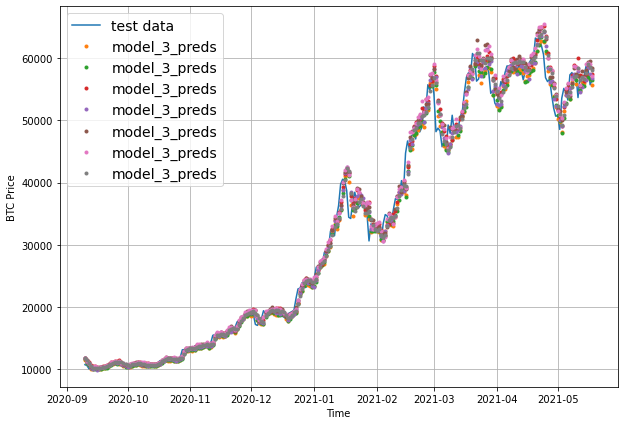

In [642]:
offset = 300
plt.figure(figsize=(10,7))
plot_time_series(timesteps=x_test[-len(test_windows):], values=test_labels[:, 0], start=offset,format="-", label="test data")
plot_time_series(timesteps=x_test[-len(test_windows):], values=model_3_preds, start=offset,  label="model_3_preds")

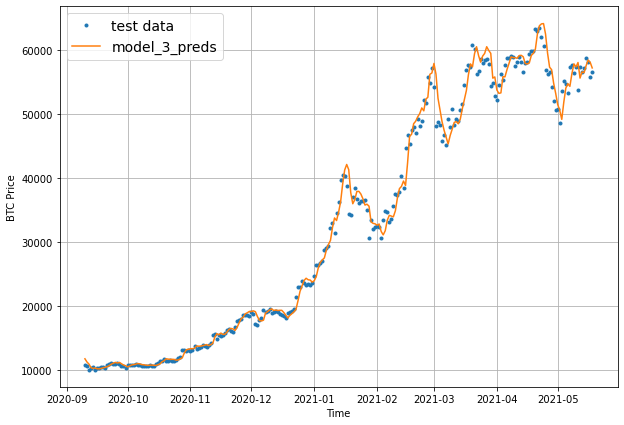

In [643]:
offset = 300
plt.figure(figsize=(10,7))
plot_time_series(timesteps=x_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="test data")
plot_time_series(timesteps=x_test[-len(test_windows):], values=tf.reduce_mean(model_3_preds, axis=1), start=offset, format="-",  label="model_3_preds")

## Which of our model is performing the best so far?

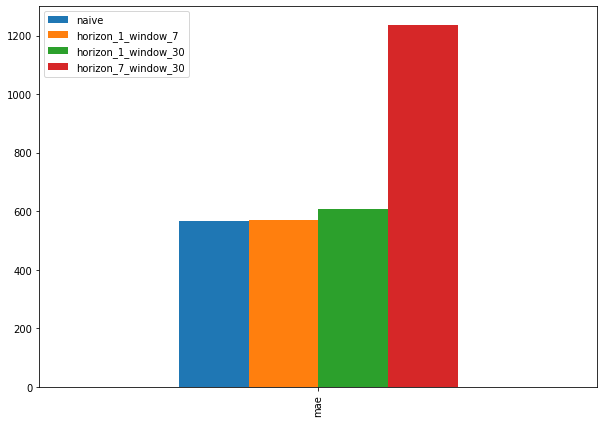

In [644]:
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10,7),kind="bar" )

## Model 4: Conv1D

In [645]:
HORIZON = 1
WINDOW_SIZE = 7

In [646]:
#Create windowed data
full_windows, full_labels = make_windows(prices, WINDOW_SIZE, HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [647]:
#Create train/test set
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(train_labels), len(test_windows), len(test_labels)

(2224, 2224, 556, 556)

We need an input shape of: (batch_size, timesteps, input_dim) for Conv1D layer.

In [648]:
#Check data input shape
train_windows[0].shape #return (WINDOW_SIZE,)

(7,)

In [649]:
# Before we pass our data to a Conv1D layer, we have to reshape it in order it works
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [650]:
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) #add an extra dimension for "input_dim"

In [651]:
# Test out our lambda layer
print(f"Original shape: {x.shape}") #WINDOW_SIZE
print(f"Expanded shape: {expand_dims_layer(x).shape}") # output = 7,1
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [652]:
tf.random.set_seed(42)

#Build the model
model_4 = tf.keras.Sequential([
                               layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
                               layers.Conv1D(filters=128, kernel_size=WINDOW_SIZE, strides=1, padding="causal", activation="relu"),
                               layers.Dense(HORIZON)
                               
], name="model_4_conv1D")

In [653]:
#Compile the model
model_4.compile(loss="mae", optimizer="Adam", metrics=["mae", "mse"])

In [654]:
#Fit the model 
model_4.fit(train_windows, train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_4.name)])

INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets wr

In [655]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_10 (Lambda)           (None, 1, 7)              0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 1, 128)            6400      
_________________________________________________________________
dense_555 (Dense)            (None, 1, 1)              129       
Total params: 6,529
Trainable params: 6,529
Non-trainable params: 0
_________________________________________________________________


In [656]:
#Evaluate model
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 613.3948 - mae: 613.3948 - mse: 1263023.0000


[613.3948364257812, 613.3948364257812, 1263023.0]

In [657]:
model_4 = tf.keras.models.load_model("model_experiments/model_4_conv1D/")
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 570.8224 - mae: 570.8224 - mse: 1184584.2500


[570.8223876953125, 570.8223876953125, 1184584.25]

In [658]:
# Make predictions
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8900.107, 8795.288, 9025.843, 8801.778, 8748.497, 8770.001,
       8686.007, 8544.434, 8480.867, 8532.078], dtype=float32)>

In [659]:
# Evaluate predictions
model_4_results = evaluate_preds(tf.squeeze(test_labels), model_4_preds)
model_4_results

{'mae': 570.8223,
 'mape': 2.5478325,
 'mase': 1.0027767,
 'mse': 1184584.2,
 'rmse': 1088.3861}

## Model 5: RNN (LSTM)

In [660]:
tf.random.set_seed(42)

#Build the model 
inputs = layers.Input(shape=WINDOW_SIZE)
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
#x = layers.LSTM(128, return_sequences=True)(x)
x = layers.LSTM(128, activation="relu")(x)
#x = layers.Dense(32, activation="relu")(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs, output, name="model_5_LSTM")

In [661]:
#Compile the model
model_5.compile(loss="mae", optimizer="Adam", metrics=["mae", "mse"])

In [662]:
#Fit the model 
model_5.fit(train_windows, train_labels,
            epochs=100, verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_5.name)])

Epoch 1/100
18/18 [==============================] - 2s 27ms/step - loss: 2323.6082 - mae: 2323.6082 - mse: 13451164.0000 - val_loss: 9222.6523 - val_mae: 9222.6523 - val_mse: 150544848.0000
INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets
Epoch 2/100
18/18 [==============================] - 0s 9ms/step - loss: 695.4739 - mae: 695.4739 - mse: 1664331.0000 - val_loss: 1486.0555 - val_mae: 1486.0555 - val_mse: 6266154.5000
INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets
Epoch 3/100
18/18 [==============================] - 0s 9ms/step - loss: 237.3967 - mae: 237.3967 - mse: 238510.3281 - val_loss: 1298.9084 - val_mae: 1298.9084 - val_mse: 4394857.5000
INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets
Epoch 4/100
18/18 [==============================] - 0s 9ms/step - loss: 181.9180 - mae: 181.9180 - mse: 168791.5625 - val_loss: 966.6430 - val_mae: 966.6430 - val_mse: 3159459.0000
INFO:tensorflow:Assets written to: mode

In [663]:
model_5 = tf.keras.models.load_model("model_experiments/model_5_LSTM/")
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 596.6447 - mae: 596.6447 - mse: 1273486.7500


[596.6446533203125, 596.6446533203125, 1273486.75]

In [664]:
# Make predictions
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8991.225, 8823.2  , 9009.359, 8847.859, 8742.254], dtype=float32)>

In [665]:
#Evaluate preds
model_5_results = evaluate_preds(tf.squeeze(test_labels), model_5_preds)
model_5_results

{'mae': 596.64465,
 'mape': 2.6838453,
 'mase': 1.0481395,
 'mse': 1273486.9,
 'rmse': 1128.4888}

## Make a multivariate time series dataset

Before we add a feature to out time series, what is a feature we can use? 

One feature we could add is whether or not Elon Musk tweeted on that day...

* day 1 - 0
* day 2 - 1
* day 3 - 0

What´s a better feature to use? 

How about the bitcoin halving events? 

In [666]:
# Let´s make a multivariate time series
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [667]:
# Let´s add bitcoin halving events to our dataset
block_reward_1 = 50 # 3 January 2009 - this block reward isn´t in our dataset (it starts from 01 October 2013)
block_reward_2 = 25 # 8 November 2012
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 18 May 2020

# Block reward dates
block_reward_2_datetime = np.datetime64("2021-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")

In [668]:
# Create date ranges of where specific block_reward values should be
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days

In [669]:
# Add in block_reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None
# Add in block_reward values as a feature to our dataframe
bitcoin_prices_block.iloc[:block_reward_2_days, -1] =  block_reward_2 #-1 is for columns
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4

In [670]:
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


In [671]:
bitcoin_prices_block.tail()

,Price,block_reward
Date,,
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25
2021-05-17,45604.615754,6.25
2021-05-18,43144.471291,6.25


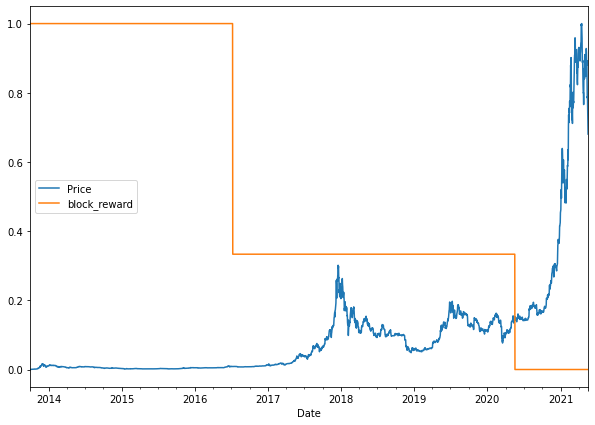

In [672]:
#Plot the block reward vs price over time
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]), columns=bitcoin_prices_block.columns,
                                     index=bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize=(10,7))

## Making a windowd dataset with pandas

Previously, we´ve turned our univariate time series into windowed dataset using the helper functions above. 

However, since we´ve got multivariate data, these functions won´t work. 

We can use the pandas.DataFrame.shift() method to window our multivariate data.

In [673]:
HORIZON = 1
WINDOW_SIZE = 7

In [674]:
# Make a copy of Bitcoin historical data with block reward feature
bitcoin_prices_windowed = bitcoin_prices_block.copy()

#Add windowed columns
for i in range(WINDOW_SIZE): #shift values for each step in WINDOW_SIE
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


What we´ve done is created a way to window our dataset directly from a pandas dataframe.
````
[0, 1, 2, 3, 4, 5, 6, block_reward] -> [7]
[1, 2, 3, 4, 5, 6, 7, block_reward] -> [8]
[2, 3, 4, 5, 6, 7, 8 block_reward] -> [9]
````

In [675]:
# Create x (windows) and y (horizon) features
x = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
x.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [676]:
y.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Price, dtype: float32

In [677]:
# Make train and test sets using indexing
split_size = int(len(x)*0.8)
x_train, y_train = x[:split_size], y[:split_size]
x_test, y_test = x[split_size:], y[split_size:]
len(x_train), len(y_train), len(x_test), len(y_test)

(2224, 2224, 556, 556)

## Model 6: Dense (multivariate time series)

In [678]:
tf.random.set_seed(42)

#Build the model 
model_6 = tf.keras.Sequential([
                               layers.Dense(128, activation="relu"),
                               layers.Dense(HORIZON)
], name="model_6_dense_multivariate")

In [679]:
#Compile the model
model_6.compile(loss="mae", optimizer="Adam", metrics=["mae", "mse"])

In [680]:
#Fit the model 
model_6.fit(x_train, y_train, 
            epochs=100, batch_size=128,
            verbose=1,
            validation_data=(x_test, y_test),
            callbacks=[create_model_checkpoint(model_6.name)])

Epoch 1/100
18/18 [==============================] - 1s 16ms/step - loss: 1234.6805 - mae: 1234.6805 - mse: 5282006.0000 - val_loss: 2061.9080 - val_mae: 2061.9080 - val_mse: 11377611.0000
INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets
Epoch 2/100
18/18 [==============================] - 0s 6ms/step - loss: 351.5053 - mae: 351.5053 - mse: 499358.0938 - val_loss: 1908.6729 - val_mae: 1908.6729 - val_mse: 8719439.0000
INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets
Epoch 3/100
18/18 [==============================] - 0s 5ms/step - loss: 235.4153 - mae: 235.4153 - mse: 276006.7812 - val_loss: 1329.0585 - val_mae: 1329.0585 - val_mse: 4991872.0000
INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets
Epoch 4/100
18/18 [==============================] - 0s 6ms/step - loss: 208.6112 - mae: 208.6112 - mse: 219502.7188 - val_loss: 1102.1340 - val_mae: 1102.1340 - val_mse: 3934655.000

In [681]:
#Evaluate
model_6.evaluate(x_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 654.9892 - mae: 654.9892 - mse: 1347329.1250


[654.9891967773438, 654.9891967773438, 1347329.125]

In [682]:
#Load and evaluate best performing model
model_6 = tf.keras.models.load_model("model_experiments/model_6_dense_multivariate/")
model_6.evaluate(x_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 567.5862 - mae: 567.5862 - mse: 1161687.2500


[567.5862426757812, 567.5862426757812, 1161687.25]

In [683]:
#Make predictions
model_6_preds = tf.squeeze(model_6.predict(x_test))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8836.276, 8763.8  , 9040.486, 8741.225, 8719.326, 8765.071,
       8661.102, 8496.891, 8463.231, 8521.585], dtype=float32)>

In [684]:
#Evaluate predictions
model_6_results = evaluate_preds(y_test, model_6_preds)
model_6_results

{'mae': 567.5863,
 'mape': 2.5413754,
 'mase': 0.99709195,
 'mse': 1161687.2,
 'rmse': 1077.8159}

## Model 7: N-BEATS algorithm

Paper: https://arxiv.org/pdf/1905.10437.pdf

### Building and testing the N-Beats block layer

Because the N-BEATS block layer doesn´t exist in TensorFlow, we´ve got to create it.

To create custom layers and models in Tensorflow we can use subclassing.

https://www.tensorflow.org/guide/keras/custom_layers_and_models

In [685]:
# Create NBeatBlock custom layer
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self, 
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs): #kwarg: keyword arguments takes care about all default arguments
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers each has ReLU activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    # Output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="linear")

  def call(self, inputs):
    x = inputs
    for layer in self.hidden:
      x = layer(x)
    theta = self.theta_layer(x)
    #Output the backcast and the forecast from theta
    #Indexing first elements and last elements of theta output
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon]
    return backcast, forecast

Let´s test our NBeatsBlock class

In [686]:
#Setup dummy NBeatsBlock
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE+HORIZON,
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [687]:
# Create dummy inputs (have to have same size as input_size)
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [688]:
# Pass dummy inputs to dummy NBeatsBlock layer
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [ 0.19014978  0.83798355 -0.32870018  0.25159916 -0.47540277 -0.77836645
 -0.5299447 ]
Forecast: -0.7554212808609009


### Preparing data for the N-Beats algorithm using `tf.data`

In [689]:
HORIZON = 1 # how far to predict forward
WINDOW_SIZE = 7 # how far to lookback

In [690]:
#Crteate NBEATS data inputs (N-BEATS works with univariate data)
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [691]:
#Add window columns
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=1+i)
bitcoin_prices_nbeats.head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [692]:
# Make features and labels
x = bitcoin_prices_nbeats.dropna().drop("Price", axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]

#Make train and test sets
split_size = int(len(x)*0.8)
x_train, y_train = x[:split_size], y[:split_size]
x_test, y_test = x[split_size:], y[split_size:]
len(x_train), len(x_test), len(y_train), len(y_test)

(2224, 556, 2224, 556)

In [693]:
# Time to make our dataset perfomant using tf.data API
train_features_dataset = tf.data.Dataset.from_tensor_slices(x_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(x_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

In [694]:
#Combine labels and features by zipping together
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

In [695]:
#Batch and prefetch 
BATCH_SIZE = 1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [696]:
train_dataset, test_dataset 

(<PrefetchDataset shapes: ((None, 7), (None,)), types: (tf.float64, tf.float64)>,
 <PrefetchDataset shapes: ((None, 7), (None,)), types: (tf.float64, tf.float64)>)

### Setting up hyperparameters for N-BEATS algorithm


In [697]:
#Values from N-BEATS paper
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30
INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON 

In [698]:
INPUT_SIZE

7

### Getting ready for residual connections

Before we can craft our N-BEATS model, we need two layers for the residual connections (substract and add).

In [699]:
#Make tensors
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

#Subtract
subtracted = layers.subtract([tensor_1, tensor_2])

#Add
added = layers.add([tensor_1, tensor_2])

#Get outputs
print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted: {subtracted.numpy()}")
print(f"Added: {added.numpy()}")

Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


### Building, compiling and fitting the N-BEATS algorithm

1. Setup and instance of the N-BEATS block layer using `NBeatsBlock` (thes will bei the initial block used for the network, the rest will be created as part of stacks)
2. Create an input layer for the N-BEATS stack (we´ll be using the Keras functional API)
3. Make the initial backcast and forecasts for the model with the layer created in(1)
4. Use for loop to create stacks of block layers
5. Use the`NBeatsBlock` class within the for loop in (4) to create blocks which return backcasts and block-level forecasts
6. Create the double residual stacking using subtract and add layers
7. Put the model inputs and outputs together using `tf.keras.Model()`
8. Compile the model with MAE loss (the paper uses multiple losses but we´ll use MAE to keep it inline with our other models) and Adam optimizer with the default settings.
9. Fit the N-BEATS model for 5000 epochs and since it´s fitting for so many epochs, we´ll use a couple of callbacks:
* Early Stopping
* Reduce LR on Plateau - if a model stops improving, try lowering the learning rate to reduce the amount it updates its weights time

In [700]:
tf.random.set_seed(42)

# 1. Setup an instance of NBeatsBlock
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

In [701]:
# 2. Create input to stacks
stack_input = layers.Input(shape=(INPUT_SIZE), name="stack_input")

In [702]:
# 3. Create initial backcast and forecast input (backwards prediction + horizon prediction)
residuals, forecast = nbeats_block_layer(stack_input)

In [703]:
# 4. Create stacks of blocks
for i, _ in enumerate(range(N_STACKS-1)): # first stack is already creted in (3)

  # 5. Use the NBeatsBlock to calculate the backcast as well as block forecast
  backcast, block_forecast = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeatsBlock_{i}"
  )(residuals) # pass it in residuals (the backcast)

  # 6. Create the double residual stacking
  residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}") 
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

In [704]:
# 7. Put theb stack model together
model_7 = tf.keras.Model(stack_input, forecast, name="model_7_NBEATS")

In [705]:
# 8. Compile the model
model_7.compile(loss="mae", optimizer="Adam", metrics=["mae", "mse"])

In [706]:
%%time
# 9. Fit the model with callbacks
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                       tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=1)])


Epoch 00713: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 01053: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 01153: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
CPU times: user 4min 8s, sys: 14.1 s, total: 4min 22s
Wall time: 9min 31s


In [707]:
# Evaluate N-Beats model on the test dataset
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 44ms/step - loss: 573.6302 - mae: 573.6302 - mse: 1168685.1250


[573.6301879882812, 573.6301879882812, 1168685.125]

In [708]:
# Make predictions with N-BEATS model
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8837.668, 8773.651, 9027.073, 8753.575, 8748.82 , 8751.718,
       8649.679, 8496.039, 8476.153, 8508.108], dtype=float32)>

In [709]:
# Evaluate N-BEATS model preds
model_7_results = evaluate_preds(y_test, model_7_preds)
model_7_results

{'mae': 573.6302,
 'mape': 2.620625,
 'mase': 1.0077094,
 'mse': 1168685.1,
 'rmse': 1081.0574}

### Plotting the N-BEATS architecture we´ve created

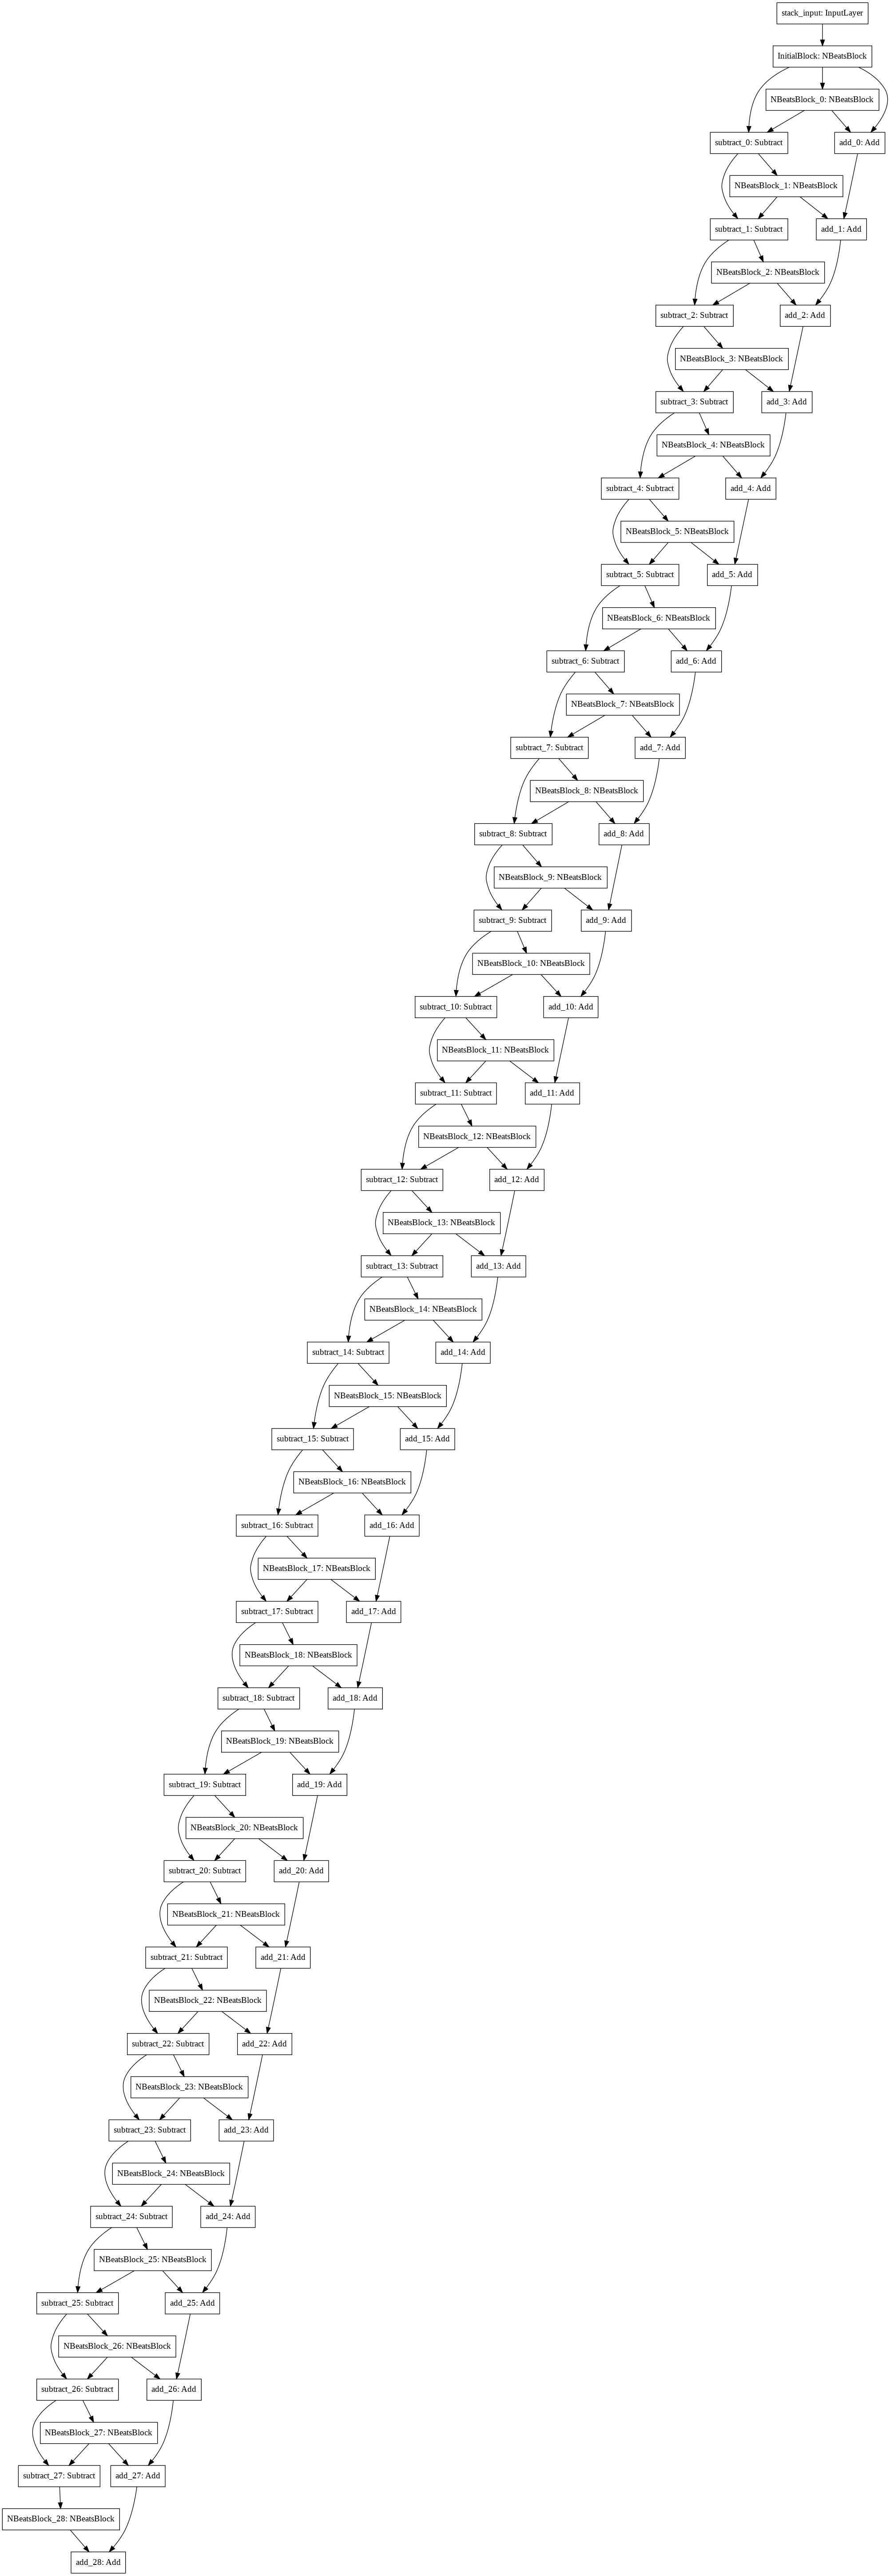

In [710]:
#Plot the N-Beats model and inspect the architecture
from tensorflow.keras.utils import plot_model
plot_model(model_7)

### Model 8: Creating an ensemble (stacking different model together)

An ensemble leverages the wisdom of the crowd effect.

It combines many different models to predict a common goal. 

In [711]:
HORIZON, WINDOW_SIZE

(1, 7)

### Constructing and fitting an ensemble of model (using different loss function)

In [712]:
def get_ensemble_models(horizon=HORIZON, 
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10, 
                        num_epochs=100, 
                        loss_fns=["mae", "mse", "mape"]):
  """
  Returns a list of num_iter models each trained on MAE, MSE and MAPE loss.

  For example, if num_iter=10, a list of 30 trained models will be returned:
  10 * len(["mae", "mse", "mape"]).
  """
  # Make empty list for trained ensemble models
  ensemble_models = []

  # Create num_iter number of models per loss function
  for i in range(num_iter):
    # Build and fit a new model with a different loss function
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

      # Construct a simple model (similar to model_1)
      model = tf.keras.Sequential([
        # Initialize layers with normal (Gaussian) distribution so we can use the models for prediction
        # interval estimation later: https://www.tensorflow.org/api_docs/python/tf/keras/initializers/HeNormal
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"), 
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(HORIZON)                                 
      ])

      # Compile simple model with current loss function
      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])
      
      # Fit model
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                # Add callbacks to prevent training from going/stalling for too long
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)])
      
      # Append fitted model to list of ensemble models
      ensemble_models.append(model)

  return ensemble_models # return list of trained models

In [713]:
%%time
#Get list of trained ensemble models
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)

Optimizing model by reducing: mae for 1000 epochs, model number: 0
Optimizing model by reducing: mse for 1000 epochs, model number: 0

Epoch 00528: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00628: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 00165: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00282: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 00382: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing: mae for 1000 epochs, model number: 1
Optimizing model by reducing: mse for 1000 epochs, model number: 1

Epoch 00409: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00509: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mape for 1000 epochs, model number: 1

Epoch 00185: ReduceLR

In [714]:
len(ensemble_models)

15

## Make predictions with our ensemble model

In [715]:
# Create a function which uses a list of trained models to make and return a list of predictions
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data)
    ensemble_preds.append(preds)

  return tf.constant(tf.squeeze(ensemble_preds))

In [716]:
# Create a list of ensemble predictions
%%time
ensemble_preds = make_ensemble_preds(ensemble_models, test_dataset)
ensemble_preds

CPU times: user 952 ms, sys: 49.7 ms, total: 1 s
Wall time: 1.09 s


In [717]:
ensemble_preds.shape

TensorShape([15, 556])

In [718]:
ensemble_mean = tf.reduce_mean(ensemble_preds, axis=0)
ensemble_mean[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8791.825, 8779.356, 9058.62 , 8721.628, 8742.548, 8715.244,
       8660.161, 8478.685, 8453.57 , 8521.147], dtype=float32)>

In [719]:
ensemble_median = np.median(ensemble_preds, axis=0)
ensemble_median[:10]

array([8793.002, 8789.779, 9060.421, 8702.536, 8758.008, 8723.911,
       8656.227, 8473.158, 8452.97 , 8525.339], dtype=float32)

In [720]:
# Evaluate ensemble model predictions
ensemble_results = evaluate_preds(y_test, ensemble_mean)
ensemble_results

{'mae': 567.2907,
 'mape': 2.57918,
 'mase': 0.9965727,
 'mse': 1141627.6,
 'rmse': 1068.4697}

### Plotting the prediction itervals (uncertainty estimates) of our ensemble

So far we´ve been making point predictions with our models.

E.g. horizon = 1, our model predicts tomorrow´s price of Bitcoin will be $50,000 USD.

Wouldn´t it be helpful if we knew a range of where that prediction came from?

Instead of 50,000 USD on the dot, how about 48,000 to 52,000 USD?

One way to get the 95% confidence prediction intervals for a deep learning model is the bootstrao method:
1. Take the predictions from a number of randomly initialized model (we´ve got this thanks to our ensemble models)
2. Measure the standard deviation of the predictions
3. Multiply the standard deviation by 1.96 (assuming the distribution is Gaussian/Normal, 95% of observations fall within 1.96 standard deviations of the mean)
4. To get the prediction interval upper and lower bounds, add and subtract the value obtained in (3) to the mean/median of the predictions made in (1) 

In [721]:
# Find upper and lower bounds of ensemble predictions
def get_upper_lower(preds): # 1. Take the predictions from a number of randomly initialized models

  # 2. Measure the standard deviation of the predictions
  std = tf.math.reduce_std(preds, axis=0)

  # 3. Multiply the standard deviation by 1.96
  interval = 1.96 * std

  # 4. Get the prediction interval upper and lower bounds
  preds_mean = tf.reduce_mean(preds, axis=0)
  lower, upper = preds_mean - interval, preds_mean + interval

  return lower, upper


In [722]:
# Get the upper and lower bounds of the 95% prediction interval
lower, upper = get_upper_lower(ensemble_preds)

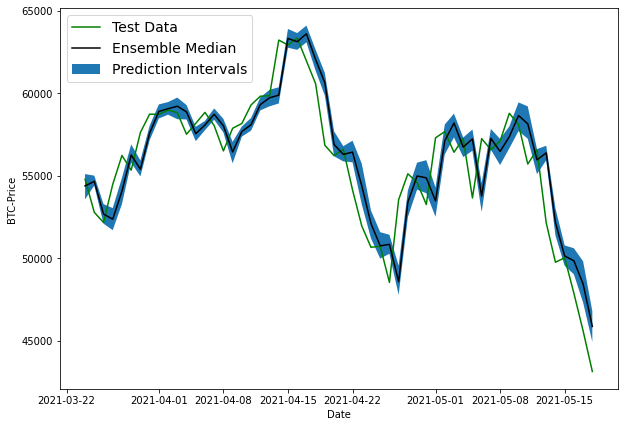

In [723]:
# Get the median/mean values of our ensemble preds
ensemble_median = np.median(ensemble_preds, axis=0)

# Plot the median of our ensemble preds along with the prediction intervals (where the prediction fall in)
offset = 500
plt.figure(figsize=(10,7))
plt.plot(x_test.index[offset:], y_test[offset:], "g", label="Test Data")
plt.plot(x_test.index[offset:], ensemble_median[offset:], "k-", label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel("BTC-Price")
plt.fill_between(x_test.index[offset:], (lower)[offset:], (upper)[offset:], label="Prediction Intervals")
plt.legend(loc="upper left", fontsize=14)

So far all of our model predictions have been lagging behind the test data...

As is they´re replicating what the naive model does and just predict the previous timestep as the next timestep.

Note: These prediction intervals are estimates themselves. And they have beedn created with the assumption that our model´s data is from a normal distribution.

## Aside: two types of uncertainty (coconut and subway)

Uncertainty estimates in machine learning seek out to qualitatively and quantitatively answer the questions:
1. What can my model know? (with perfect data, what´s possible for a model to learn?
2. What doesn´t my model know? (what can a model never predict? Or would it be helpful if a model could tell you that when it´s making a prediction, it doesn´t know if it´s right or not?)

There are two major types of uncertainty in machine learning you should know about:
* ``Aleatoric uncertainty`` - this type of uncertainty cannot be reduced and it is often referred as "data" uncertainty or "subway" uncertainty
* ``Epistemic uncertainty`` - this type of uncertainty can be reduced, it is also referred to as "model" or "coconut" uncertainty

## Model 9: Train a model on the full historical data to make predictions into the future

So far all of our model have predicted on the test dataset, however, this is only a pseudofuture.

In [724]:
HORIZON=1
WINDOW_SIZE=7

In [725]:
bitcoin_prices_windowed.head()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [726]:
bitcoin_prices_windowed.tail()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2021-05-14,49764.132082,6.25,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2021-05-15,50032.693137,6.25,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2021-05-16,47885.625255,6.25,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679
2021-05-17,45604.615754,6.25,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426
2021-05-18,43144.471291,6.25,45604.615754,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651


In [727]:
# Train model on entire data to make predictions for the next day
x_all = bitcoin_prices_windowed.dropna().drop(["Price", "block_reward"], axis=1).to_numpy()
#Get labels+
y_all = bitcoin_prices_windowed.dropna()["Price"].to_numpy()

len(x_all), len(y_all)

(2780, 2780)

In [728]:
x_all[:5], y_all[:5]

(array([[121.795  , 120.65533, 121.33866, 118.67466, 108.58483, 125.455  ,
         123.65499],
        [123.033  , 121.795  , 120.65533, 121.33866, 118.67466, 108.58483,
         125.455  ],
        [124.049  , 123.033  , 121.795  , 120.65533, 121.33866, 118.67466,
         108.58483],
        [125.96116, 124.049  , 123.033  , 121.795  , 120.65533, 121.33866,
         118.67466],
        [125.27966, 125.96116, 124.049  , 123.033  , 121.795  , 120.65533,
         121.33866]]),
 array([123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ]))

In [729]:
#Turn data into efficient running tensors

features_dataset_all = tf.data.Dataset.from_tensor_slices(x_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

#Combine features and labels
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

#Batch and prefetch for optimal performance
BATCH_SIZE=1024
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<PrefetchDataset shapes: ((None, 7), (None,)), types: (tf.float64, tf.float64)>

In [730]:
tf.random.set_seed(42)

#Build the model
model_9 = tf.keras.Sequential([
                               layers.Dense(128, activation="relu"),
                               layers.Dense(128, activation="relu"),
                               layers.Dense(HORIZON)
],name="model_9_future_model")

In [731]:
#Compile the model
model_9.compile(loss="mae", optimizer="Adam", metrics=["mae", "mse"])

In [732]:
#Fit the model
model_9.fit(dataset_all, epochs=100,
            verbose=0)

### Make predictions into future

In [733]:
# How many timesteps to predict into the future?
INTO_FUTURE = 14

To make predictions into the future we want a function which:

1. Takes as input:
  * a list of values (Bitcoin historical data)
  * a trained model (such as `model_9`)
  * a window into the futur to predict (out `INTO_FUTURE`) variable
  * The window size a model was trained (`WINDOW_SIZE`) - the model can only predict on the same kind of data it was trained on
2. Creates an empty list for future forecasts (this will bee returned at the end of the end, when it´s full of predictions) and extracts the last `WINDOW_SIZE` values from the input values.
3. Loop `INTO_FUTURE` times making a prediction on `WINDOW_SIZE` sequences which update to remove the first value and append the latest prediction


In [734]:
# 1. Create function to make predictions into the future
def make_future_forecast(values, model, into_future, window_size=WINDOW_SIZE) -> list:
  """
  Makes future forecasts into_future steps after values ends.

  Returns future forecasts as list of floats.
  """
  # 2. Make an empty list for future forecasts/prepare data to forecast on
  future_forecast = []
  last_window = values[-WINDOW_SIZE:] # only want preds from the last window (this will get updated)

  # 3. Make INTO_FUTURE number of predictions, altering the data which gets predicted on each time 
  for _ in range(into_future):
    
    # Predict on last window then append it again, again, again (model starts to make forecasts on its own forecasts)
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on: \n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")
    
    # Append predictions to future_forecast
    future_forecast.append(tf.squeeze(future_pred).numpy())
    # print(future_forecast)

    # Update last window with new pred and get WINDOW_SIZE most recent preds (model was trained on WINDOW_SIZE windows)
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]
  
  return future_forecast

In [735]:
# Make forecasts into the future
future_forecast = make_future_forecast(values=y_all,
                                       model=model_9,
                                       into_future=INTO_FUTURE,
                                       window_size=WINDOW_SIZE)

Predicting on: 
 [56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086] -> Prediction: 55764.46484375

Predicting on: 
 [52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 55764.46484375] -> Prediction: 50985.9453125

Predicting on: 
 [49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 55764.46484375 50985.9453125 ] -> Prediction: 48522.96484375

Predicting on: 
 [50032.69313676 47885.62525472 45604.61575361 43144.47129086
 55764.46484375 50985.9453125  48522.96484375] -> Prediction: 48137.203125

Predicting on: 
 [47885.62525472 45604.61575361 43144.47129086 55764.46484375
 50985.9453125  48522.96484375 48137.203125  ] -> Prediction: 47880.63671875

Predicting on: 
 [45604.61575361 43144.47129086 55764.46484375 50985.9453125
 48522.96484375 48137.203125   47880.63671875] -> Prediction: 46879.71875

Predicting on: 
 [43144.47129086 55764.46484375 50985.9453125  48522.96

### Plot future forecasts

In [736]:
def get_future_dates(start_date, into_future, offset=1):
  """
  Returns array of datetime values from ranging from start_date to start_date+horizon.

  start_date: date to start range (np.datetime64)
  into_future: number of days to add onto start date for range (int)
  offset: number of days to offset start_date by (default 1)
  """
  start_date = start_date + np.timedelta64(offset, "D") # specify start date, "D" stands for day
  end_date = start_date + np.timedelta64(into_future, "D") # specify end date
  return np.arange(start_date, end_date, dtype="datetime64[D]") # return a date range between start date and end date

In [737]:
#Last timestep of timesteps
last_timestep = bitcoin_prices.index[-1]
last_timestep

Timestamp('2021-05-18 00:00:00')

In [738]:
next_time_steps = get_future_dates(last_timestep, INTO_FUTURE)
next_time_steps

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

In [739]:
# Insert last timestep/final price into next time steps and future forecats so the plot doesn´t looks jenky
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, btc_price[-1])
next_time_steps, future_forecast

(array(['2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21',
        '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25',
        '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29',
        '2021-05-30', '2021-05-31', '2021-06-01'], dtype='datetime64[D]'),
 array([43144.473, 55764.465, 50985.945, 48522.965, 48137.203, 47880.637,
        46879.72 , 48227.6  , 53963.69 , 49685.56 , 47596.176, 48114.43 ,
        48808.008, 48623.855, 50178.723], dtype=float32))

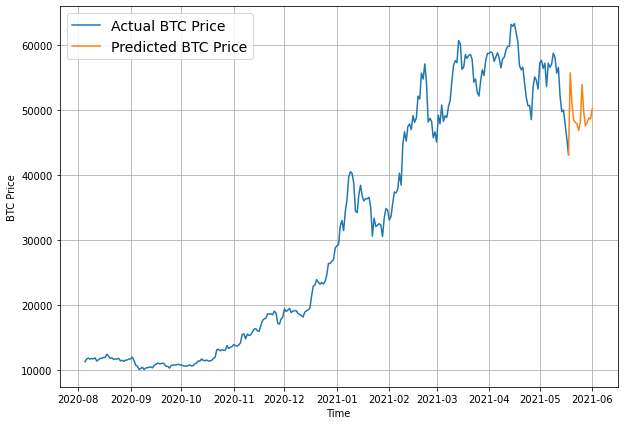

In [740]:
#Plot future prices predictions of Bitcoin
plt.figure(figsize=(10, 7))
plot_time_series(bitcoin_prices.index, btc_price, start=2500, format="-", label="Actual BTC Price")
plot_time_series(next_time_steps, future_forecast, format="-", label="Predicted BTC Price")

## Model 10: Why forecasting is BS (the turkey problem)

In [743]:
# Let´s introduce a turkey problem to out BTC data (price of BTC falls 100x in one day)
btc_price_turkey = btc_price.copy()
btc_price_turkey[-1] = btc_price_turkey[-1] / 100

In [744]:
btc_price_turkey[-10:]

[58788.2096789273,
 58102.1914262342,
 55715.5466512869,
 56573.5554719043,
 52147.8211869823,
 49764.1320815975,
 50032.6931367648,
 47885.6252547166,
 45604.6157536131,
 431.44471290860304]

In [745]:
#Get the timesteps for the turkey problem
btc_timesteps_turkey = np.array(bitcoin_prices.index)
btc_timesteps_turkey[-10:]

array(['2021-05-09T00:00:00.000000000', '2021-05-10T00:00:00.000000000',
       '2021-05-11T00:00:00.000000000', '2021-05-12T00:00:00.000000000',
       '2021-05-13T00:00:00.000000000', '2021-05-14T00:00:00.000000000',
       '2021-05-15T00:00:00.000000000', '2021-05-16T00:00:00.000000000',
       '2021-05-17T00:00:00.000000000', '2021-05-18T00:00:00.000000000'],
      dtype='datetime64[ns]')

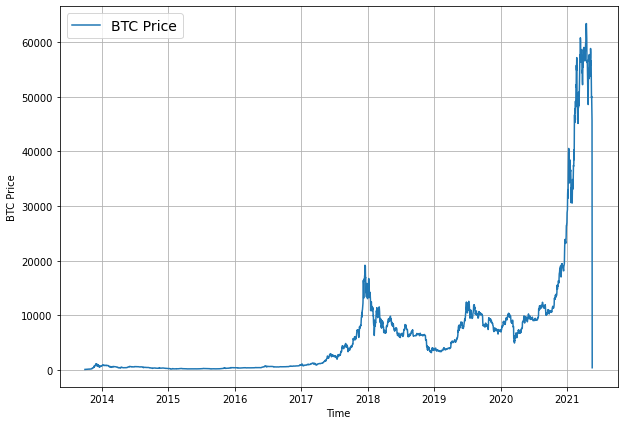

In [746]:
plt.figure(figsize=(10,7))
plot_time_series(btc_timesteps_turkey,
                 btc_price_turkey,
                 format="-",
                 label="BTC Price")

In [747]:
HORIZON=1
WINDOW_SIZE=7

In [748]:
#Create train and test sets for turkey problem
full_windows, full_labels = make_windows(np.array(btc_price_turkey), WINDOW_SIZE, HORIZON)
x_train, x_test, y_train, y_test = make_train_test_splits(full_windows, full_labels)

### Build a turkey model (model to predict on turkey data

In [759]:
tf.random.set_seed(42)

#Build the model
turkey_model = tf.keras.Sequential([
                                layers.Dense(128, activation="relu"),
                                layers.Dense(HORIZON)
], name="model_10_turkey_model")

In [760]:
#Compile the model
turkey_model.compile(loss="mae", optimizer="Adam", metrics=["mse", "mae"])

In [762]:
turkey_model.fit(x_train, y_train, 
                 epochs=100,
                 verbose=0,
                 batch_size=128,
                 validation_data=(x_test, y_test),
                 callbacks=[create_model_checkpoint(turkey_model.name)])

INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets
INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets
INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets
INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets
INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets
INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets
INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets
INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets
INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets
INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets
INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets
INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets
INFO:tensorflow:

In [763]:
#Evaluate the model 
turkey_model.evaluate(x_test, y_test)

18/18 [==============================] - 0s 5ms/step - loss: 662.7982 - mse: 4870422.0000 - mae: 662.7982


[662.7982177734375, 4870422.0, 662.7982177734375]

In [764]:
# Load best performing turkey model and evaluate on test data
turkey_model = tf.keras.models.load_model("model_experiments/model_10_turkey_model/")
turkey_model.evaluate(x_test, y_test)

18/18 [==============================] - 0s 4ms/step - loss: 645.7731 - mse: 4872246.5000 - mae: 645.7731


[645.7731323242188, 4872246.5, 645.7731323242188]

In [765]:
#Make predictions with turkey model
turkey_preds = make_preds(turkey_model, x_test)
turkey_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8861.711, 8769.886, 9015.71 , 8795.517, 8723.809, 8730.11 ,
       8691.95 , 8502.054, 8460.961, 8516.547], dtype=float32)>

In [766]:
#Evaluate turkey preds
turkey_results = evaluate_preds(y_test, turkey_preds)
turkey_results

{'mae': 17125.523,
 'mape': 121.30851,
 'mase': 26.501802,
 'mse': 614164860.0,
 'rmse': 23707.299}

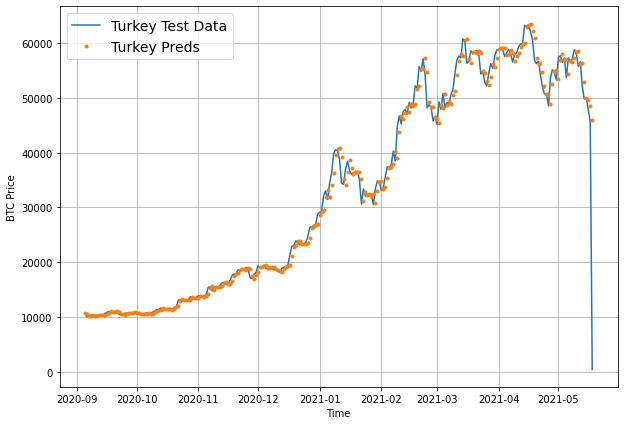

In [771]:
plt.figure(figsize=(10, 7))
# plot_time_series(timesteps=btc_timesteps_turkey[:split_size], values=btc_price_turkey[:split_size], label="Train Data")
offset=300
plot_time_series(timesteps=btc_timesteps_turkey[-len(x_test):], 
                 values=btc_price_turkey[-len(y_test):], 
                 format="-", 
                 label="Turkey Test Data", start=offset)
plot_time_series(timesteps=btc_timesteps_turkey[-len(x_test):],
                 values=turkey_preds, 
                 label="Turkey Preds", 
                 start=offset);

##Compare Model results

In [776]:
# Compare different model results (w=window, h=horizon)
model_results = pd.DataFrame({"naive_model": naive_results,
                              "model_1_dense_w7_h1": model_1_results,
                              "model_2_dense_w30_h1": model_2_results,
                              "model_3_dense_w30_h7": model_3_results,
                              "model_4_CONV1D": model_4_results,
                              "model_5_LSTM": model_5_results,
                              "model_6_multivariate": model_6_results,
                              "model_7_NBEATS": model_7_results,
                              "model_8_ensemble": ensemble_results,
                              "model_10_turkey": turkey_results}).T
model_results.head(10)

,mae,mse,rmse,mape,mase
naive_model,567.980225,1.147547e+06,1071.236206,2.516525,0.999570
model_1_dense_w7_h1,568.951233,1.171744e+06,1082.471191,2.544898,0.999490
model_2_dense_w30_h1,608.961487,1.281439e+06,1132.006470,2.769339,1.064471
model_3_dense_w30_h7,1237.506348,5.405198e+06,1425.747925,5.558878,2.202073
model_4_CONV1D,570.822327,1.184584e+06,1088.386108,2.547832,1.002777
model_5_LSTM,596.644653,1.273487e+06,1128.488770,2.683845,1.048139
model_6_multivariate,567.586304,1.161687e+06,1077.815918,2.541375,0.997092
model_7_NBEATS,573.630188,1.168685e+06,1081.057373,2.620625,1.007709
model_8_ensemble,567.290710,1.141628e+06,1068.469727,2.579180,0.996573
model_10_turkey,17125.523438,6.141649e+08,23707.298828,121.308510,26.501802


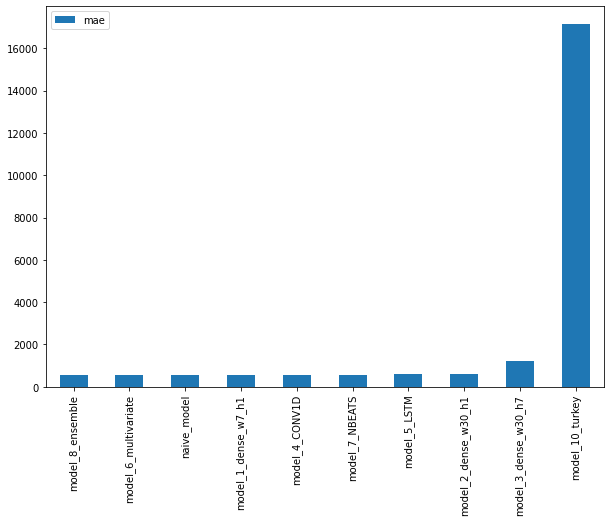

In [775]:
#Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10,7), kind="bar")